In [3]:
import json
import pandas as pd
import h5py
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Input, Dense, Dropout, LSTM, Flatten, GRU,TimeDistributed, Conv1D
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
import os
import h5py
import matplotlib.pyplot as plt
from keras import regularizers
from tensorflow.keras.regularizers import l1
import ast
from tqdm import tqdm
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from pandas import read_csv
from keras.wrappers.scikit_learn import KerasClassifier


In [4]:
checkpoint_dir = os.path.dirname(checkpoint_path)


In [5]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [2]:
pip install --upgrade tables


     |████████████████████████████████| 4.3MB 5.9MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


In [9]:
def learningCurve(history):
    plt.figure(figsize=(10,8))
    plt.plot(history.history['loss'], linewidth=1)
    plt.plot(history.history['val_loss'], linewidth=1)
    plt.title('Model Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['training sample loss','validation sample loss'])
    #plt.savefig('Learning_curve.pdf')
    plt.show()
    plt.close()

In [10]:
def makeRoc(features_val, labels_val, labels, model, outputDir='', outputSuffix=''):
    from sklearn.metrics import roc_curve, auc
    labels_pred = model.predict(features_val)
    df = pd.DataFrame()
    fpr = {}
    tpr = {}
    auc1 = {}
    plt.figure(figsize=(10,8))       
    for i, label in enumerate(labels):
        df[label] = labels_val[:,i]
        df[label + '_pred'] = labels_pred[:,i]
        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])
        auc1[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label],tpr[label],label='%s tagger, AUC = %.1f%%'%(label.replace('j_',''),auc1[label]*100.))
    plt.plot([0, 1], [0, 1], lw=1, color='black', linestyle='--')
    #plt.semilogy()
    plt.xlabel("Background Efficiency")
    plt.ylabel("Signal Efficiency")
    plt.xlim([-0.05, 1.05])
    plt.ylim(0.001,1.05)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.figtext(0.25, 0.90,'LSTM ROC Curve',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
    #plt.figtext(0.35, 0.90,'preliminary', style='italic', wrap=True, horizontalalignment='center', fontsize=14) 
    #plt.savefig('%sROC_%s.pdf'%(outputDir, outputSuffix))
    return labels_pred

In [11]:
scorers = {
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
        }

In [2]:
tweets = []
num = 0
for line in open('dataset.json', 'r'):
    num = num + 1
    if num <1000000:
        tweets.append(json.loads(line))

data = np.array(tweets)

/global/homes/a/anrunw/miniconda2/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [51]:
data[0][5]

[[[0.0311627, 0.0820037, 0.0714865, 0.0122187, -0.0702538],
  [0.000626321,
   -2.06042e-06,
   0.00897404,
   -4.44436e-06,
   2.2186e-07,
   5.92208e-08,
   -7.96081e-08,
   1.86396e-05,
   1.22249e-09,
   9.49398e-08,
   -4.94616e-06,
   -4.01517e-07,
   9.04106e-08,
   -5.40489e-10,
   1.00434e-06],
  [0.971217],
  [0.305714, 0, 'NaN', 'NaN', 0, 2, 0.278014]],
 [[0.0440594, 0.0793784, 0.0859708, 0.00393219, 0.113113],
  [0.000626321,
   -2.06042e-06,
   0.00897404,
   -4.44436e-06,
   2.2186e-07,
   5.92208e-08,
   -7.96081e-08,
   1.86396e-05,
   1.22249e-09,
   9.49398e-08,
   -4.94616e-06,
   -4.01517e-07,
   9.04106e-08,
   -5.40489e-10,
   1.00434e-06],
  [0.942343],
  [0.305714, 0, 'NaN', 'NaN', 0, 2, 0.278014]],
 [[-0.312833, 1.02502, -0.132586, 0.00861097, -0.193043],
  [0.000626321,
   -2.06042e-06,
   0.00897404,
   -4.44436e-06,
   2.2186e-07,
   5.92208e-08,
   -7.96081e-08,
   1.86396e-05,
   1.22249e-09,
   9.49398e-08,
   -4.94616e-06,
   -4.01517e-07,
   9.04106e-08

In [44]:
g = 0
num = 0
for x in data:
    if x[2] == 0:
        g = num
        break
    num = num+1

In [46]:
g

6

In [4]:
np.save('val', data)

In [2]:
df = pd.read_json('dataset.json', lines = True)

KeyboardInterrupt: 

In [4]:
x = np.load('3mil.npy', allow_pickle=True)

In [4]:
features = np.load('4.5mil.npy', allow_pickle=True)

In [ ]:
z = np.load('test.npy', allow_pickle=True)

In [3]:
data

array([[[ 9.81978e-01,  2.45914e-03,  7.03694e-04, ...,  1.47348e+00,
          4.50740e+01,  2.75471e-01],
        [ 9.67329e-01,  2.45914e-03,  7.03694e-04, ...,  1.47348e+00,
          4.50740e+01,  2.75471e-01],
        [ 9.33630e-01,  2.45914e-03,  7.03694e-04, ...,  1.47348e+00,
          4.50740e+01,  2.75471e-01],
        ...,
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
          0.00000e+00,  0.00000e+00],
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
          0.00000e+00,  0.00000e+00],
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
          0.00000e+00,  0.00000e+00]],

       [[ 9.39687e-01,  5.36676e-04, -3.45404e-05, ...,         -inf,
          3.88523e+01, -2.13641e+00],
        [ 9.79582e-01,  4.77209e-04, -2.54455e-05, ...,         -inf,
          3.88523e+01, -2.13641e+00],
        [ 9.77083e-01,  5.36676e-04, -3.45404e-05, ...,         -inf,
          3.88523e+01, -2.13641e+00],
        ...,


In [6]:
labels = features[:,2]

In [7]:
labels

array([5, 5, 5, ..., 0, 0, 0], dtype=object)

In [8]:
np.save('alllabels', labels)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
length = len(data)
featuresnum = 16

In [5]:
features = np.zeros([length,15,44])


In [6]:
num = 0
exceptions = 0
for z in tqdm(data):
    try:
        k = z[5]
        k = np.array(k)
        num1 = 0
        for p in k:
            p = np.nan_to_num(p)
            num4 = 0
            for g in np.array(p[2]):
                features[num][num1][num4] = g
                num4 = num4 + 1
            for g in np.array(p[1]):
                features[num][num1][num4] = g
                num4 = num4 + 1
            for g in np.array(p[0]):
                features[num][num1][num4] = g
                num4 = num4 + 1
            for g in np.array(p[3]):
                features[num][num1][num4] = g
                num4 = num4 + 1
            for g in range(8):
                features[num][num1][num4] = z[3][g]
                num4 = num4+1
            for g in range(6):
                features[num][num1][num4] = z[4][g]
                num4 = num4+1
            features[num][num1][num4] = z[0]
            num4 = num4+1
            features[num][num1][num4]=z[1]
            num1 = num1 + 1
            
    except:
        exceptions = exceptions + 1
    data[num] = 0
    num = num + 1

  0%|          | 0/4000000 [00:00<?, ?it/s]/global/homes/a/anrunw/miniconda2/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
100%|██████████| 4000000/4000000 [19:45<00:00, 3375.36it/s]


In [6]:
np.save('lfeatures', features)

In [11]:
features[2]

array([[ 9.83099e-01,  1.24814e-03,  1.69242e-04,  2.43054e-02,
        -9.99338e-06, -7.11463e-07,  1.18222e-07,  1.28239e-08,
         1.53515e-05,  4.19506e-10,  1.68791e-08, -4.53369e-06,
        -3.21213e-07,  8.45251e-08,  1.20073e-10,  4.99996e-07,
        -1.74386e-02, -6.85803e-03,  1.05128e-01,  5.10482e-02,
         1.83081e-01,  8.07986e-01,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  2.00000e+00,  2.83732e-01,
         1.98813e+00,  4.93606e-01,  3.30972e-01,  4.39893e-02,
         2.00000e+00,  2.63070e-03,  5.75696e-02,  8.85966e-02,
         6.88561e+01,  1.00000e+00,  3.00000e+00,  5.08225e-02,
         1.58290e+00,  6.79857e-01,  4.39097e+01,  1.05940e+00],
       [ 9.79770e-01,  1.01546e-03,  6.40621e-05,  1.32748e-02,
        -7.82267e-06, -5.94500e-07,  9.56319e-08, -1.38305e-08,
         1.15548e-05,  3.98565e-10,  2.05216e-08, -4.82003e-06,
        -5.67003e-08,  8.59521e-08,  1.37711e-09,  6.21183e-07,
        -8.17393e-03,  1.30535e-01, -1.

In [3]:
features = np.load('features.npy')

ValueError: cannot reshape array of size 1417672688 into shape (4000000,15,44)

In [4]:
labels = np.load('labels.npy')

In [4]:
features = data

In [ ]:
features = np.nan_to_num(features)

In [3]:
features[features > 1e308] = 0

In [4]:
features[features < -1e308] = 0

In [ ]:
features[np.isnan(features) == True] = 0

In [5]:
for x in tqdm(range(len(features))):
    for y in range(15):
        for z in range(44):
            if np.isnan(features[x][y][z]) == True:
                features[x][y][z] = 0

100%|██████████| 4000000/4000000 [3:00:07<00:00, 370.11it/s]  


In [36]:
np.isnan(features[0][1][23])

True

In [ ]:
features[0]

In [ ]:
np.save('features', features)

In [8]:
lab = np.zeros((400000,1))

NameError: name 'length' is not defined

In [6]:
labels = data[:,2]

In [7]:
light = 0
charm = 0
bottom = 0
for x in labels:
    if x == 0:
        light = light + 1
    if x == 4:
        charm = charm + 1
    if x == 5:
        bottom = bottom + 1

In [19]:
charm

436454

In [24]:
num = 0
for x in labels:
    if x == 5:
        lab[num] = 1
    num = num + 1

In [26]:
np.save('labels', lab)

In [ ]:
np.save('trackfeat', features)

In [ ]:
np.save('labels', lab)

In [31]:
def getModel(dropout, optimizer, lsize,size):
    model = Sequential()
    model.add(LSTM(lsize))
    model.add(Dense(size, activation = 'relu', kernel_initializaer = 'lecun_uniform'))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name = 'output_sigmoid'))
    model.compile(optimizer= optimizer , loss = tf.losses.categorical_crossentropy , metrics=['accuracy'])
    return model

In [ ]:
labels = ['light/charm&bottom']


In [ ]:
Kmodel = KerasClassifier(build_fn= getModel(0.1, Adam(0.1)), verbose=1)

In [28]:
data = np.load('drive/Shareddrives/Jet Classification/Data/Jet Flavor/labels.npy')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.2, random_state = 42)


In [5]:
np.save('X_train', X_train)

In [6]:
np.save('X_test', X_test)

In [7]:
np.save('y_train', y_train)

In [8]:
np.save('y_test', y_test)

In [ ]:
Inputs = Input(shape= (15, 44))
x = Flatten(trainable = True)(Inputs)
x = Dense(256, activation='relu', kernel_initializer='lecun_uniform', name='fc1_relu')(x)
x= Dropout(rate = 0.5)(x)
x = Dense(128, activation='relu', kernel_initializer='lecun_uniform', name = 'fc2')(x)
x= Dropout(rate = 0.5)(x)
x = Dense(64, activation='relu', kernel_initializer='lecun_uniform', name = 'fc3')(x)
x= Dropout(rate = 0.5)(x)
x = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name='fc4')(x)
x= Dropout(rate = 0.5)(x)
x = Dense(16, activation='relu', kernel_initializer='lecun_uniform', name='fc7')(x)
predictions = Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15, 44)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 660)               0         
_________________________________________________________________
fc1_relu (Dense)             (None, 256)               169216    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
fc2 (Dense)                  (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
fc3 (Dense)                  (None, 64)                8256  

In [ ]:
adam = Adam(lr = 0.002)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
optimizer = [Adam(lr = 0.0001), Adam(lr = 0.001), Adam(lr = 0.002), Adam(lr = 0.01)]

In [13]:
lsize = range(0, 500, 10)

In [16]:
lsize = list(lsize)

In [17]:
size = list(range(50,500,10))

In [18]:
dropout = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

In [19]:
epochs = [15,20,25,30,35,40,45,50]

In [20]:
batch_size = [128, 256, 512, 1024, 2048]

In [32]:
param_grid = dict(lsize = lsize, size = size,  optimizer=optimizer, dropout = dropout, batch_size = batch_size)


In [33]:
Kmodel = KerasClassifier(build_fn=getModel, verbose=1)


In [34]:
random = RandomizedSearchCV(estimator=Kmodel, param_distributions=param_grid, scoring='accuracy', n_jobs=-1, refit='boolean')


In [36]:
dense_result = random.fit(X_train,y_train, verbose = 10)

exception calling callback for <Future at 0x7fa125328fd0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 792, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/usr/local/lib/python3.6/dist-packages/joblib/_parallel_backends.py", line 531, in apply_async
    future = self._workers.submit(SafeFunction(func))
  File "/usr/local/lib/

TerminatedWorkerError: ignored

In [ ]:
Kmodel = KerasClassifier(build_fn=getModel, verbose=1)


In [ ]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 100, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/100
269/269 [==============================] - 5s 8ms/step - loss: 0.7466 - accuracy: 0.6469 - val_loss: 0.3982 - val_accuracy: 0.8444
Epoch 2/100
269/269 [==============================] - 2s 6ms/step - loss: 0.4075 - accuracy: 0.8355 - val_loss: 0.3934 - val_accuracy: 0.8549
Epoch 3/100
269/269 [==============================] - 2s 6ms/step - loss: 0.3784 - accuracy: 0.8462 - val_loss: 0.4080 - val_accuracy: 0.8568
Epoch 4/100
269/269 [==============================] - 2s 6ms/step - loss: 0.3672 - accuracy: 0.8489 - val_loss: 0.3787 - val_accuracy: 0.8565
Epoch 5/100
269/269 [==============================] - 1s 6ms/step - loss: 0.3590 - accuracy: 0.8507 - val_loss: 0.3793 - val_accuracy: 0.8614
Epoch 6/100
269/269 [==============================] - 2s 6ms/step - loss: 0.3542 - accuracy: 0.8524 - val_loss: 0.3748 - val_accuracy: 0.8600
Epoch 7/100
269/269 [==============================] - 2s 6ms/step - loss: 0.3485 - accuracy: 0.8539 - val_loss: 0.3734 - val_accuracy: 0.8625

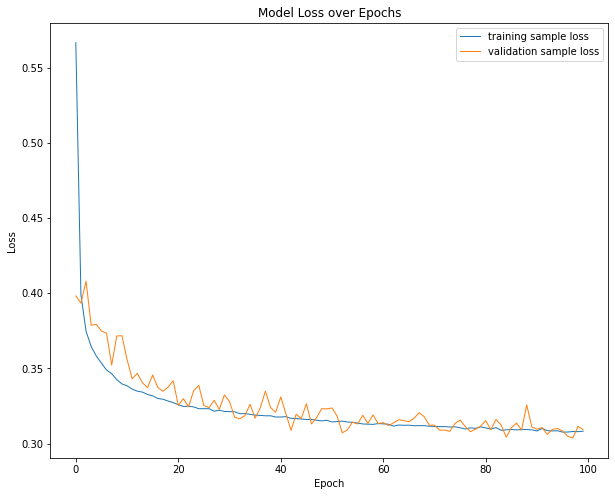

In [ ]:
learningCurve(history)

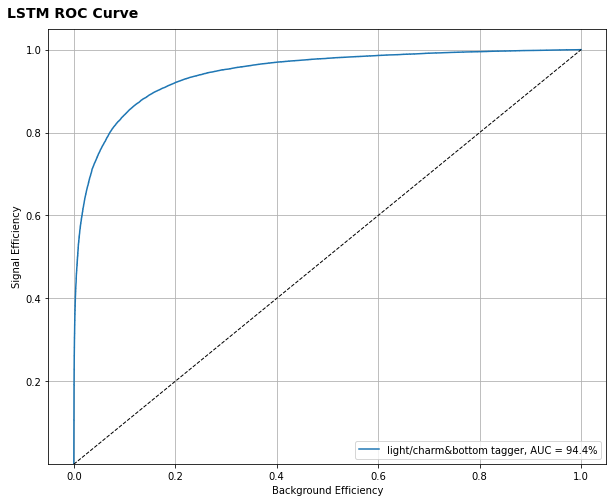

In [ ]:
y_pred = makeRoc(X_test.astype(float), y_test.astype(float), labels, model, outputSuffix='two-layer')

In [ ]:
def getModel(units, l1Reg, l1RegR):
    model = Sequential()
    model.add(LSTM(units, kernel_initializer = 'VarianceScaling', kernel_regularizer = regularizers.l1_l2(l1= l1Reg, l2 = l1RegR), name = 'lstm1')),
    model.add(Flatten(trainable = True)),
    model.add(Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name='rnn_densef')),
    model.compile(optimizer= 'adam' , loss = tf.losses.categorical_crossentropy , metrics=['accuracy']),
    return model

In [ ]:
optimizer = [Adam(lr = 0.0001), Adam(lr = 0.001), Adam(lr = 0.002), Adam(lr = 0.01)]
dropout = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
epochs = [15,20,25,30,35,40,45,50]
batch_size = [128, 256, 512, 1024, 2048]
l1Reg = [0.0001, 0.0002, 0.001, 0.002]
l1RegR = [0.0001, 0.0002, 0.001, 0.002]
units = [4, 8, 16, 32, 64, 128]

In [ ]:
param_grid = dict(units = units, batch_size = batch_size, l1Reg = l1Reg, l1RegR = l1RegR)


In [ ]:
Kmodel = KerasClassifier(build_fn=getModel, verbose=1)


In [ ]:
random = RandomizedSearchCV(estimator=Kmodel, param_distributions=param_grid, scoring='accuracy', n_jobs=1, refit='boolean', verbose = 10)


In [ ]:
LSTM_result = random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] units=8, l1RegR=0.0002, l1Reg=0.0002, batch_size=2048 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


144/144 [==============================] - 1s 6ms/step - loss: 0.0202 - accuracy: 0.5240
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
36/36 [==============================] - 0s 3ms/step
[CV]  units=8, l1RegR=0.0002, l1Reg=0.0002, batch_size=2048, score=0.517, total=   5.0s
[CV] units=8, l1RegR=0.0002, l1Reg=0.0002, batch_size=2048 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


36/36 [==============================] - 0s 3ms/step
[CV]  units=8, l1RegR=0.0002, l1Reg=0.0002, batch_size=2048, score=0.502, total=   3.3s
[CV] units=8, l1RegR=0.0002, l1Reg=0.0002, batch_size=2048 ...........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.4s remaining:    0.0s


36/36 [==============================] - 0s 3ms/step
[CV]  units=8, l1RegR=0.0002, l1Reg=0.0002, batch_size=2048, score=0.477, total=   3.8s
[CV] units=8, l1RegR=0.0002, l1Reg=0.0002, batch_size=2048 ...........


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.2s remaining:    0.0s


36/36 [==============================] - 0s 3ms/step
[CV]  units=8, l1RegR=0.0002, l1Reg=0.0002, batch_size=2048, score=0.478, total=   3.2s
[CV] units=8, l1RegR=0.0002, l1Reg=0.0002, batch_size=2048 ...........


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.4s remaining:    0.0s


36/36 [==============================] - 0s 3ms/step
[CV]  units=8, l1RegR=0.0002, l1Reg=0.0002, batch_size=2048, score=0.472, total=   3.5s
[CV] units=32, l1RegR=0.001, l1Reg=0.0002, batch_size=1024 ...........


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.0s remaining:    0.0s


72/72 [==============================] - 0s 2ms/step
[CV]  units=32, l1RegR=0.001, l1Reg=0.0002, batch_size=1024, score=0.531, total=   4.0s
[CV] units=32, l1RegR=0.001, l1Reg=0.0002, batch_size=1024 ...........


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.0s remaining:    0.0s


72/72 [==============================] - 0s 2ms/step
[CV]  units=32, l1RegR=0.001, l1Reg=0.0002, batch_size=1024, score=0.529, total=   4.2s
[CV] units=32, l1RegR=0.001, l1Reg=0.0002, batch_size=1024 ...........


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   27.2s remaining:    0.0s


72/72 [==============================] - 0s 2ms/step
[CV]  units=32, l1RegR=0.001, l1Reg=0.0002, batch_size=1024, score=0.526, total=   4.0s
[CV] units=32, l1RegR=0.001, l1Reg=0.0002, batch_size=1024 ...........


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   31.3s remaining:    0.0s


72/72 [==============================] - 0s 2ms/step
[CV]  units=32, l1RegR=0.001, l1Reg=0.0002, batch_size=1024, score=0.501, total=   3.9s
[CV] units=32, l1RegR=0.001, l1Reg=0.0002, batch_size=1024 ...........


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   35.2s remaining:    0.0s


72/72 [==============================] - 0s 2ms/step
[CV]  units=32, l1RegR=0.001, l1Reg=0.0002, batch_size=1024, score=0.494, total=   4.3s
[CV] units=32, l1RegR=0.0002, l1Reg=0.0001, batch_size=1024 ..........
72/72 [==============================] - 0s 2ms/step
[CV]  units=32, l1RegR=0.0002, l1Reg=0.0001, batch_size=1024, score=0.501, total=   4.0s
[CV] units=32, l1RegR=0.0002, l1Reg=0.0001, batch_size=1024 ..........
72/72 [==============================] - 0s 2ms/step
[CV]  units=32, l1RegR=0.0002, l1Reg=0.0001, batch_size=1024, score=0.514, total=   4.2s
[CV] units=32, l1RegR=0.0002, l1Reg=0.0001, batch_size=1024 ..........
72/72 [==============================] - 0s 2ms/step
[CV]  units=32, l1RegR=0.0002, l1Reg=0.0001, batch_size=1024, score=0.486, total=   4.0s
[CV] units=32, l1RegR=0.0002, l1Reg=0.0001, batch_size=1024 ..........
72/72 [==============================] - 0s 2ms/step
[CV]  units=32, l1RegR=0.0002, l1Reg=0.0001, batch_size=1024, score=0.507, total=   3.9s
[CV] un

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.0min finished


359/359 [==============================] - 2s 5ms/step - loss: 0.0780 - accuracy: 0.5246


In [ ]:
LSTM_result.best_estimator_.get_params()

{'batch_size': 1024,
 'build_fn': <function __main__.getModel>,
 'l1Reg': 0.0002,
 'l1RegR': 0.001,
 'units': 32,
 'verbose': 1}

In [ ]:

l1Reg =  0.0001
l1RegR = 0.001

Inputs = Input(shape = (15,44))

x = GRU(16,kernel_regularizer=l1(l1Reg),recurrent_regularizer=l1(l1RegR),activation='relu', recurrent_activation='sigmoid', name='gru_selu',)(Inputs)
x = Dense(20,kernel_regularizer=l1(l1Reg),activation='relu', kernel_initializer='lecun_uniform', name='dense_relu')(x)
predictions = Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name='rnn_densef')(x)
model = Model(inputs=Inputs, outputs=predictions)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15, 44)]          0         
_________________________________________________________________
gru_selu (GRU)               (None, 16)                2976      
_________________________________________________________________
dense_relu (Dense)           (None, 20)                340       
_________________________________________________________________
rnn_densef (Dense)           (None, 1)                 21        
Total params: 3,337
Trainable params: 3,337
Non-trainable params: 0
_________________________________________________________________


In [ ]:

adam = Adam(lr = 0.002)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 50, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/50
269/269 [==============================] - 14s 41ms/step - loss: 0.7083 - accuracy: 0.6430 - val_loss: 0.4291 - val_accuracy: 0.8393
Epoch 2/50
269/269 [==============================] - 10s 37ms/step - loss: 0.4164 - accuracy: 0.8433 - val_loss: 0.3899 - val_accuracy: 0.8520
Epoch 3/50
269/269 [==============================] - 10s 37ms/step - loss: 0.3871 - accuracy: 0.8525 - val_loss: 0.3759 - val_accuracy: 0.8552
Epoch 4/50
269/269 [==============================] - 10s 38ms/step - loss: 0.3779 - accuracy: 0.8544 - val_loss: 0.3683 - val_accuracy: 0.8587
Epoch 5/50
269/269 [==============================] - 10s 39ms/step - loss: 0.3705 - accuracy: 0.8558 - val_loss: 0.3626 - val_accuracy: 0.8594
Epoch 6/50
269/269 [==============================] - 10s 38ms/step - loss: 0.3667 - accuracy: 0.8566 - val_loss: 0.3593 - val_accuracy: 0.8596
Epoch 7/50
269/269 [==============================] - 10s 37ms/step - loss: 0.3609 - accuracy: 0.8594 - val_loss: 0.3532 - val_accuracy:

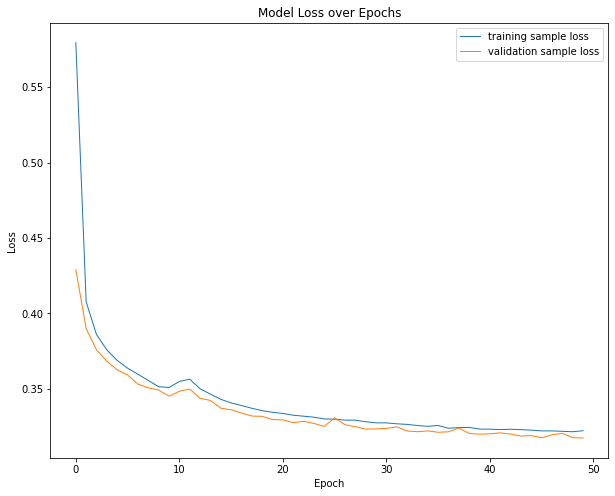

In [ ]:
learningCurve(history)

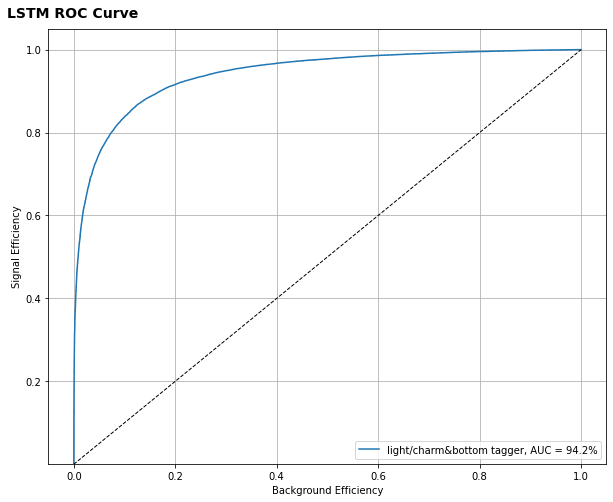

In [ ]:
y_pred = makeRoc(X_test.astype(float), y_test.astype(float), labels, model, outputSuffix='two-layer')

In [ ]:
Inputs = Input(shape=(15,44))
x = LSTM(32, kernel_initializer = 'VarianceScaling', kernel_regularizer = regularizers.l1_l2(l1= 9.999E-5, l2 = 0.0), name = 'lstm1')(Inputs)
x = Dense(64, activation='relu', kernel_initializer='lecun_uniform', name='fc4')(x)
x= Dropout(rate = 0.1)(x)
x = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name='fc7')(x)
x= Dropout(rate = 0.1)(x)
x = Dense(16, activation='relu', kernel_initializer='lecun_uniform', name='fc8')(x)
predictions = Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 15, 44)]          0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 32)                9856      
_________________________________________________________________
fc4 (Dense)                  (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
fc7 (Dense)                  (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
fc8 (Dense)                  (None, 16)                528 

In [ ]:
adam = Adam(lr = 0.002)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 125, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/125
269/269 [==============================] - 9s 10ms/step - loss: 0.5470 - accuracy: 0.7728 - val_loss: 0.3625 - val_accuracy: 0.8544
Epoch 2/125
269/269 [==============================] - 2s 7ms/step - loss: 0.3597 - accuracy: 0.8552 - val_loss: 0.3435 - val_accuracy: 0.8607
Epoch 3/125
269/269 [==============================] - 2s 7ms/step - loss: 0.3445 - accuracy: 0.8592 - val_loss: 0.3338 - val_accuracy: 0.8638
Epoch 4/125
269/269 [==============================] - 2s 7ms/step - loss: 0.3370 - accuracy: 0.8622 - val_loss: 0.3303 - val_accuracy: 0.8657
Epoch 5/125
269/269 [==============================] - 2s 7ms/step - loss: 0.3334 - accuracy: 0.8642 - val_loss: 0.3254 - val_accuracy: 0.8669
Epoch 6/125
269/269 [==============================] - 2s 7ms/step - loss: 0.3296 - accuracy: 0.8646 - val_loss: 0.3227 - val_accuracy: 0.8682
Epoch 7/125
269/269 [==============================] - 2s 7ms/step - loss: 0.3263 - accuracy: 0.8668 - val_loss: 0.3212 - val_accuracy: 0.868

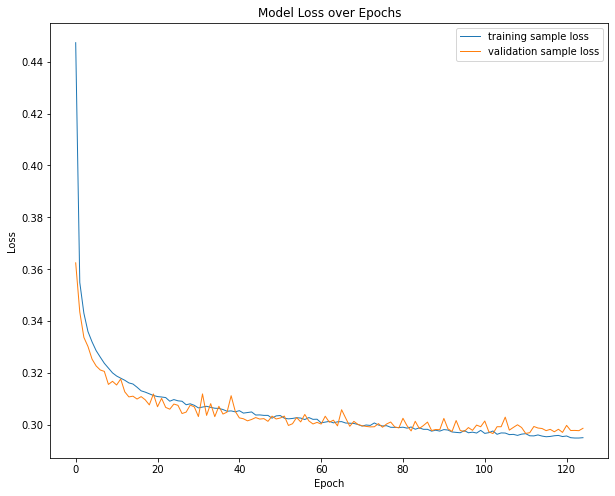

In [ ]:
learningCurve(history)

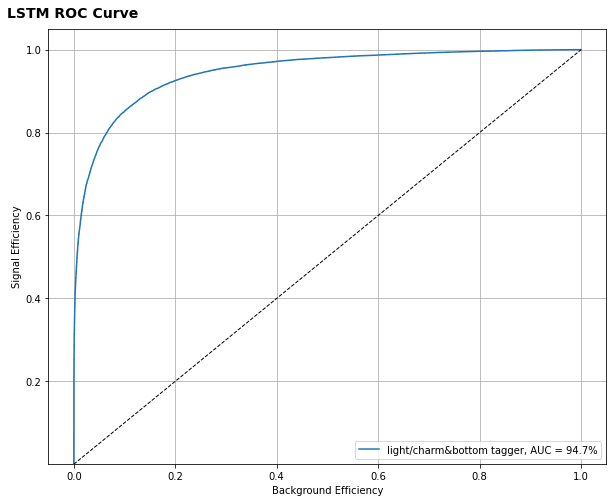

In [ ]:
y_pred = makeRoc(X_test.astype(float), y_test.astype(float), labels, model, outputSuffix='two-layer')

In [ ]:
Inputs = Input(shape=(15,44))
x = LSTM(32, kernel_initializer = 'VarianceScaling', kernel_regularizer = regularizers.l1_l2(l1= 0.0002, l2 = 0.001), name = 'lstm1')(Inputs)
x = Flatten(trainable= True)(x)
predictions = Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()


Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 15, 44)]          0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 32)                9856      
_________________________________________________________________
flatten_8 (Flatten)          (None, 32)                0         
_________________________________________________________________
output_sigmoid (Dense)       (None, 1)                 33        
Total params: 9,889
Trainable params: 9,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Inputs = Input(shape=(15,21))
x = LSTM(32, kernel_initializer = 'VarianceScaling', kernel_regularizer = regularizers.l1_l2(l1= 0.0002, l2 = 0.001), name = 'lstm1')(Inputs)
x = Flatten(trainable= True)(x)
predictions = Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 15, 21)]          0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 32)                6912      
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
output_sigmoid (Dense)       (None, 1)                 33        
Total params: 6,945
Trainable params: 6,945
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam = Adam(lr = 0.002)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 150, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/150
269/269 [==============================] - 4s 9ms/step - loss: 0.6607 - accuracy: 0.7954 - val_loss: 0.3714 - val_accuracy: 0.8577
Epoch 2/150
269/269 [==============================] - 2s 7ms/step - loss: 0.3662 - accuracy: 0.8561 - val_loss: 0.3432 - val_accuracy: 0.8620
Epoch 3/150
269/269 [==============================] - 2s 7ms/step - loss: 0.3432 - accuracy: 0.8608 - val_loss: 0.3369 - val_accuracy: 0.8625
Epoch 4/150
269/269 [==============================] - 2s 7ms/step - loss: 0.3377 - accuracy: 0.8621 - val_loss: 0.3329 - val_accuracy: 0.8637
Epoch 5/150
269/269 [==============================] - 2s 7ms/step - loss: 0.3342 - accuracy: 0.8632 - val_loss: 0.3339 - val_accuracy: 0.8626
Epoch 6/150
269/269 [==============================] - 2s 7ms/step - loss: 0.3320 - accuracy: 0.8639 - val_loss: 0.3293 - val_accuracy: 0.8650
Epoch 7/150
269/269 [==============================] - 2s 7ms/step - loss: 0.3309 - accuracy: 0.8642 - val_loss: 0.3244 - val_accuracy: 0.8672

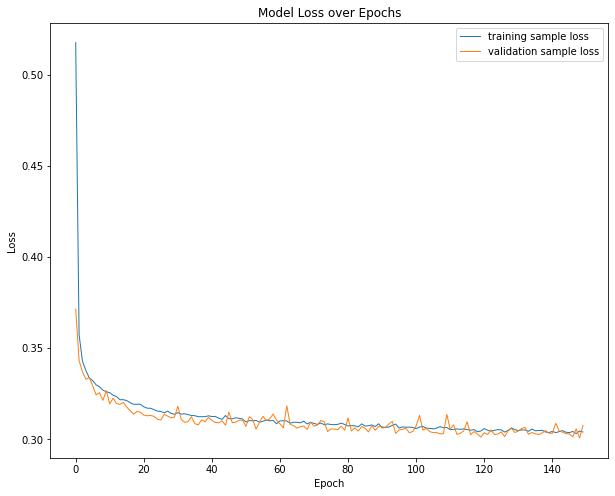

In [ ]:
learningCurve(history)

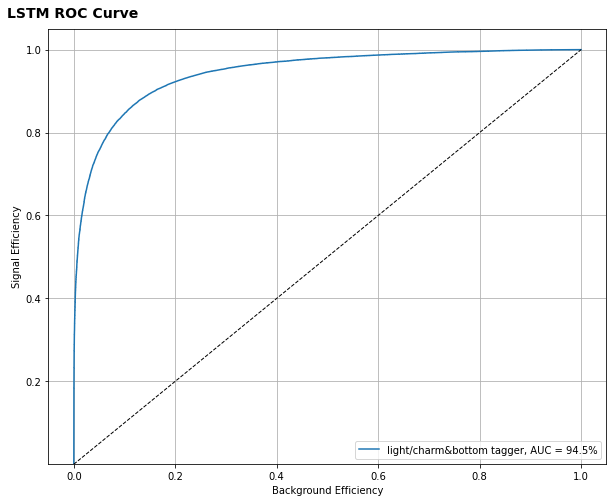

In [ ]:
y_pred = makeRoc(X_test.astype(float), y_test.astype(float), labels, model, outputSuffix='two-layer')

In [ ]:
def Pair_inputs(data, num_tracks_for_pairing = 15):
    """
        assuming data shape is: (batch, num_tracks, 13)
    
        returns:
        ---------
        (batch , num_tracks_for_pairing**2, 26)
    """

    # Example: input of shape (batch, 10 (const. #tracks), 13)
    # --> 100 pairs including (a,b), (b,a)
    # stacking the pairs' features together --> 2*13 features
    # will be re-permuted & duplicated into (batch, 100, 26)
    # [optional] transpose / reshape --> (batch * 100, 26)

    sp = data.shape
    
    num_feat = sp[2]
    assert data.ndim==3

    result = np.zeros((sp[0], num_tracks_for_pairing**2, num_feat*2),'float32')

    
    for i in range(num_tracks_for_pairing):
        result[:, i::num_tracks_for_pairing, :num_feat] = data
        result[:, i*num_tracks_for_pairing:num_tracks_for_pairing + i*num_tracks_for_pairing, num_feat:] = data

    return result

In [ ]:
pair = Pair_inputs(X_train)

In [ ]:
Inputs = Input(shape=(225,88))
x = Conv1D(10,1, activation = 'relu', kernel_initializer = 'lecun_uniform')(Inputs)
x= Dropout(rate = 0.1)(x)
x=Flatten()(x)
x = Dense(16, activation='relu', kernel_initializer='lecun_uniform', name='fc7')(x)
x = Dropout(rate = 0.1)(x)
x = Dense(2, activation='relu', kernel_initializer='lecun_uniform', name='fc6')(x)

predictions = Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(x)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 225, 88)]         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 225, 10)           890       
_________________________________________________________________
dropout_6 (Dropout)          (None, 225, 10)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2250)              0         
_________________________________________________________________
fc7 (Dense)                  (None, 16)                36016     
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
fc6 (Dense)                  (None, 2)                 34  

In [ ]:
adam = Adam(lr = 0.002)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(pair, y_train, batch_size = 1024, epochs = 60, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

ResourceExhaustedError: OOM when allocating tensor with shape[275232,225,42] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:GatherV2]

In [ ]:
learningCurve(history)

In [ ]:
X_test = pair_inputs(X_test)

In [ ]:
y_pred = makeRoc(X_test.astype('float64'), y_test.astype('float64'), labels, model, outputSuffix='two-layer')